In [1]:
import numpy
import librain as lb
import fnames
import matplotlib.pyplot as plt

## Constants

In [2]:
height = 256
width = 256

## File paths

In [3]:
blacklist = [
    "20180312/Experiment_11",
    "20180312/Experiment_12",
    "20180312/Experiment_13",
    "20180315",
    "20180419/Experiment_1",
    "20180419/Experiment_2",
    "20180420",
    "20180424",
    "20171031",
    "20171101",
    "20171027b",
]

In [4]:
path = "E:\\2_mice"  # location of "date" folders

direc = lb.Data(path)

date = "20180312"

# help(direc.experiment)

# help(direc.file)

file_dict = {}

for i in range(1, 11):
    EXP = direc.experiment(date, i)
    file_dict[f"file_{i}_12"] = direc.file(
        exp_folder=EXP, fname="trunc"
    )
# try: print(fnames.fnames.get("trunc")) to see an example of a file that would correspond to
# fname="trunc" in direc.file

EXP_1_16 = direc.experiment("march 16 2018", exp_num=1)

EXP_2_16 = direc.experiment("march 16 2018", exp_num=2)

file_1_16 = direc.file(exp_folder=EXP_1_16, fname="trunc")

file_2_16 = direc.file(exp_folder=EXP_2_16, fname="trunc")

In [5]:
together_files = []

together_files_range = [2, 4, 6, 8, 10]

for i in together_files_range:
    together_files.append(file_dict.get("file_{}_12".format(i)))
    
together_files.append(file_1_16)

In [6]:
print("together_files =")

for i in together_files:
    print(i)

together_files =
E:\2_mice\20180312\Experiment_2\LEFT_GREEN_processed__interp_dff0_bandpass0.01-3.0Hz_MM803L_March-12_1520_experiment-2_M804R_wt_cage-mates_mouse_rail_together_12mm_TRUNCATED.npy
E:\2_mice\20180312\Experiment_4\LEFT_GREEN_processed__interp_dff0_bandpass0.01-3.0Hz_MM802L_March-12_1552_experiment-4_M802R_wt_cage-mates_mouse_rail_together_12mm_2GL_TRUNCATED.npy
E:\2_mice\20180312\Experiment_6\LEFT_GREEN_processed__interp_dff0_bandpass0.01-3.0Hz_MM803L_March-12_1633_experiment-6_M802R_wt_cage-mates_mouse_rail_together_12mm_TRUNCATED.npy
E:\2_mice\20180312\Experiment_8\LEFT_GREEN_processed__interp_dff0_bandpass0.01-3.0Hz_MM802L_March-12_1701_experiment-8_M804R_wt_cage-mates_mouse_rail_together_12mm_2GL_TRUNCATED.npy
E:\2_mice\20180312\Experiment_10\LEFT_GREEN_processed__interp_dff0_bandpass0.01-3.0Hz_MM802L_March-12_1759_experiment-10_M804R_wt_cage-mates_mouse_rail_together_12mm_TRUNCATED.npy
E:\2_mice\20180316\Experiment_1\LEFT_GREEN_processed__interp_dff0_bandpass0.01-3.0H

In [7]:
full_separation_files = []

full_separation_files_range = [1, 3, 5, 7, 9]

for i in full_separation_files_range:
    full_separation_files.append(file_dict.get("file_{}_12".format(i)))
    
full_separation_files.append(file_2_16)

In [8]:
print("full_separation_files =")

for i in full_separation_files:
    print(i)

full_separation_files =
E:\2_mice\20180312\Experiment_1\LEFT_GREEN_processed__dff0_bandpass0.01-3.0Hz_MM803L_March-12_1511_experiment-1_M804R_wt_cage-mates_mouse_rail_full_separation_160mm_TRUNCATED.npy
E:\2_mice\20180312\Experiment_3\LEFT_GREEN_processed__interp_dff0_bandpass0.01-3.0Hz_MM802L_March-12_1544_experiment-3_M802R_wt_cage-mates_mouse_rail_full_separation_160mm_2GL_TRUNCATED.npy
E:\2_mice\20180312\Experiment_5\LEFT_GREEN_processed__interp_dff0_bandpass0.01-3.0Hz_MM803L_March-12_1624_experiment-5_M802R_wt_cage-mates_mouse_rail_full_separation_160mm_TRUNCATED.npy
E:\2_mice\20180312\Experiment_7\LEFT_GREEN_processed__dff0_bandpass0.01-3.0Hz_MM802L_March-12_1651_experiment-7_M804R_wt_cage-mates_mouse_rail_full_separation_160mm_2GL_TRUNCATED.npy
E:\2_mice\20180312\Experiment_9\LEFT_GREEN_processed__dff0_bandpass0.01-3.0Hz_MM802L_March-12_1744_experiment-9_M804R_wt_cage-mates_mouse_rail_full_separation_160mm_TRUNCATED.npy
E:\2_mice\20180316\Experiment_2\LEFT_GREEN_processed__inter

In [9]:
label_file = EXP_1_16 + "\\" + "the_seed_labels.npy"

### Load the separation and interaction frames

In [15]:
together_matrices = []
for together_file in together_files:
    mat = numpy.load(together_file)
    together_matrices.append(mat)
    
together_mean = numpy.mean(together_matrices, axis=0)
together_std = numpy.std(together_matrices, axis=0)

separate_matrices = []
for separate_file in full_separation_files:
    mat = numpy.load(separate_file)
    separate_matrices.append(mat)

separate_mean = numpy.mean(separate_matrices, axis=0)
separate_std = numpy.std(separate_matrices, axis=0)

#load labels
the_labels = numpy.load(label_file)
n_labels = numpy.size(the_labels)

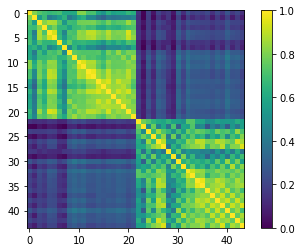

In [11]:
plt.figure()
plt.imshow(together_mean, vmin=0, vmax=1)
plt.colorbar()

### Plot correlation matrices for together experiments

Saved as left_mice_together_matrices.png
Saved as right_mice_together_matrices.png
Saved as across_mice_together_matrices.png


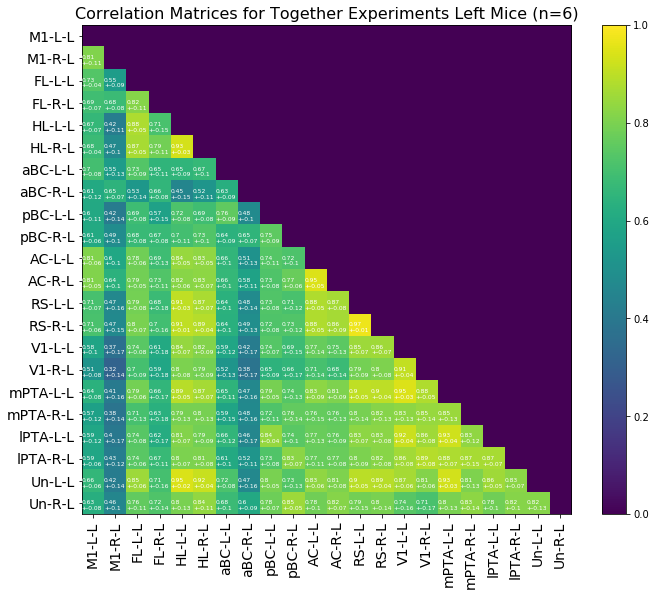

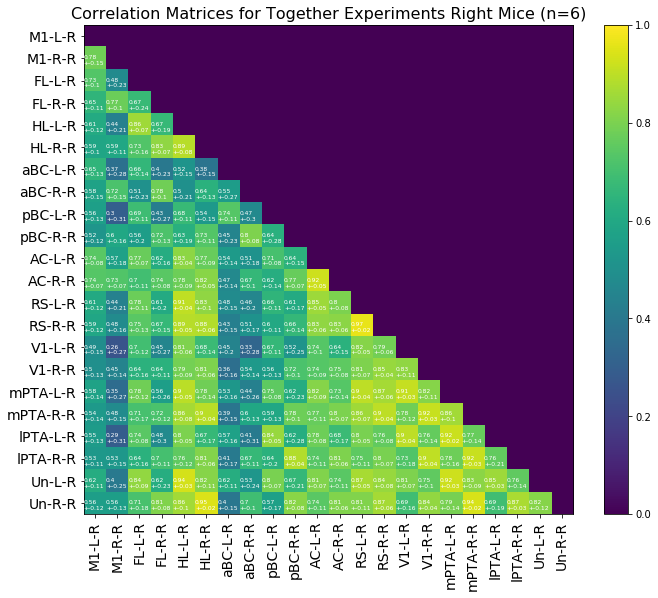

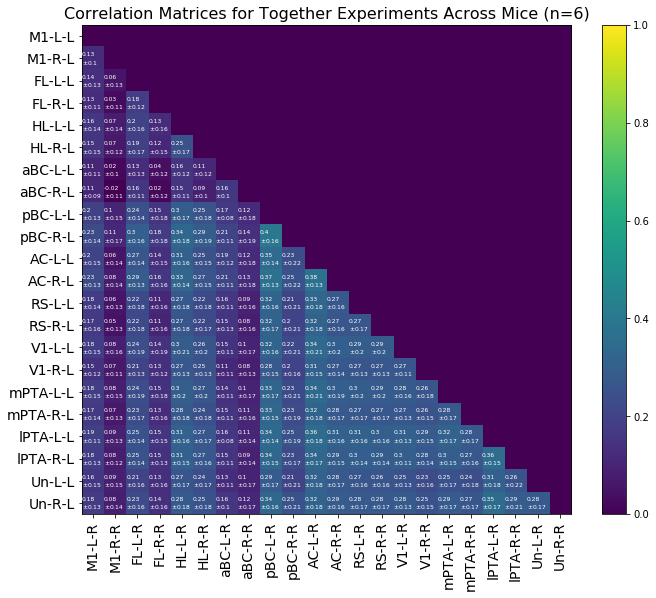

In [13]:
left_mouse_cm_mean = together_mean[
    : n_labels // 2, : n_labels // 2
]
right_mouse_cm_mean = together_mean[
    n_labels // 2 :, n_labels // 2 :
]
cross_mouse_cm_mean = together_mean[
    : n_labels // 2, n_labels // 2 :
]

left_mouse_cm_sem = together_std[
    : n_labels // 2, : n_labels // 2
]
right_mouse_cm_sem = together_std[
    n_labels // 2 :, n_labels // 2 :
]
cross_mouse_cm_sem = together_std[
    : n_labels // 2, n_labels // 2 :
]

plt.figure(figsize=(11, 9))
plt.imshow(numpy.tril(left_mouse_cm_mean, -1), vmin=0, vmax=1)
plt.title(
    "Correlation Matrices for Together Experiments Left Mice (n=%s)"
    % str(len(together_files)),
    size=16,
)
ticks = [i for i in range(n_labels // 2)]
plt.xticks(
    ticks,
    the_labels[: n_labels // 2],
    rotation="vertical",
    size=14,
)
plt.yticks(ticks, the_labels[: n_labels // 2], size=14)
for i in range(n_labels // 2):
    for j in range(0, i):
        plt.text(
            j - 0.5,
            i + 0.3,
            str(numpy.round(left_mouse_cm_mean[i, j], 2))
            + "\n+-"
            + str(numpy.round(left_mouse_cm_sem[i, j], 2)),
            fontsize=6,
            color="white",
        )
plt.colorbar()

res = lb.Output(path)

# help(res.saveas)

l_mice_together_fname = res.saveas(
    f_out=plt,
    suffix='left_mice_together_matrices',
    ftype='png',
    save=True,
    fig=True,
)

plt.figure(figsize=(11, 9))
plt.imshow(numpy.tril(right_mouse_cm_mean, -1), vmin=0, vmax=1)
plt.title(
    "Correlation Matrices for Together Experiments Right Mice (n=%s)"
    % str(len(full_separation_files)),
    size=16,
)
ticks = [i for i in range(n_labels // 2)]
plt.xticks(
    ticks,
    the_labels[n_labels // 2 :],
    rotation="vertical",
    size=14,
)
plt.yticks(ticks, the_labels[n_labels // 2 :], size=14)
for i in range(n_labels // 2):
    for j in range(0, i):
        plt.text(
            j - 0.5,
            i + 0.3,
            str(numpy.round(right_mouse_cm_mean[i, j], 2))
            + "\n+-"
            + str(numpy.round(right_mouse_cm_sem[i, j], 2)),
            fontsize=6,
            color="white",
        )
plt.colorbar()

r_mice_together_fname = res.saveas(
    f_out=plt,
    suffix='right_mice_together_matrices',
    ftype='png',
    save=True,
    fig=True,
)

plt.figure(figsize=(11, 9))
plt.imshow(numpy.tril(cross_mouse_cm_mean, -1), vmin=0, vmax=1)
plt.title(
    "Correlation Matrices for Together Experiments Across Mice (n=%s)"
    % str(len(full_separation_files)),
    size=16,
)
ticks = [i for i in range(n_labels // 2)]
plt.xticks(
    ticks,
    the_labels[n_labels // 2 :],
    rotation="vertical",
    size=14,
)
plt.yticks(ticks, the_labels[: n_labels // 2], size=14)
for i in range(n_labels // 2):
    for j in range(0, i):
        plt.text(
            j - 0.5,
            i + 0.3,
            str(numpy.round(cross_mouse_cm_mean[i, j], 2))
            + "\n"
            + r"$\pm$"
            + str(numpy.round(cross_mouse_cm_sem[i, j], 2)),
            fontsize=6,
            color="white",
        )
plt.colorbar()

across_mice_together_fname = res.saveas(
    f_out=plt,
    suffix='across_mice_together_matrices',
    ftype='png',
    save=True,
    fig=True,
)

### Plot correlation matrices for separate experiments

Saved as left_mice_separate_matrices.png
Saved as right_mice_separate_matrices.png
Saved as across_mice_separate_matrices.png


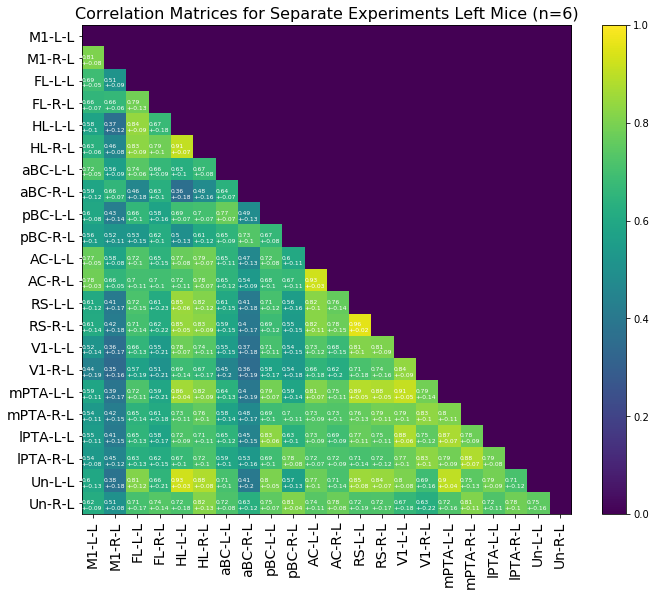

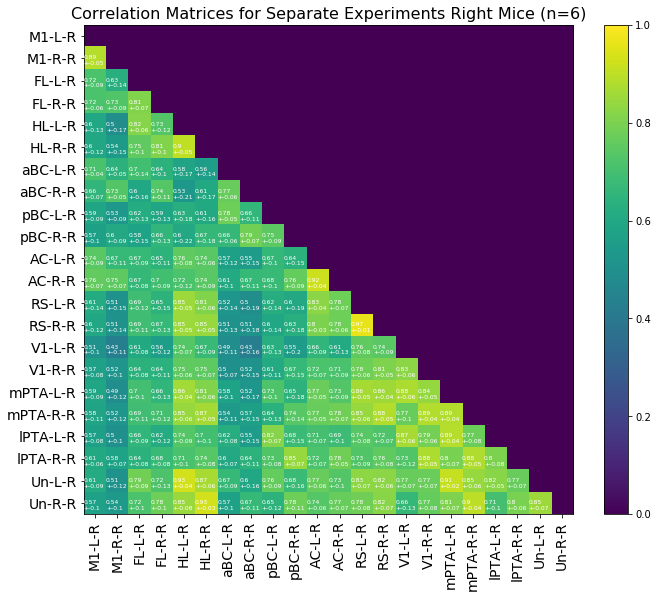

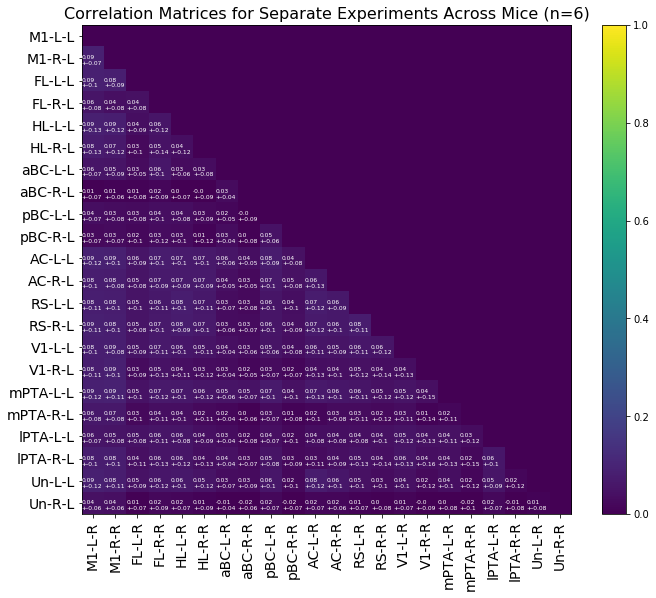

In [17]:
left_mouse_ncm_mean = separate_mean[
    : n_labels // 2, : n_labels // 2
]
right_mouse_ncm_mean = separate_mean[
    n_labels // 2 :, n_labels // 2 :
]
cross_mouse_ncm_mean = separate_mean[
    : n_labels // 2, n_labels // 2 :
]

left_mouse_ncm_sem = separate_std[
    : n_labels // 2, : n_labels // 2
]
right_mouse_ncm_sem = separate_std[
    n_labels // 2 :, n_labels // 2 :
]
cross_mouse_ncm_sem = separate_std[
    : n_labels // 2, n_labels // 2 :
]

plt.figure(figsize=(11, 9))
plt.imshow(
    numpy.tril(left_mouse_ncm_mean, -1), vmin=0, vmax=1
)
plt.title(
    "Correlation Matrices for Separate Experiments Left Mice (n=%s)"
    % str(len(together_files)),
    size=16,
)
ticks = [i for i in range(n_labels // 2)]
plt.xticks(
    ticks,
    the_labels[: n_labels // 2],
    rotation="vertical",
    size=14,
)
plt.yticks(ticks, the_labels[: n_labels // 2], size=14)
for i in range(n_labels // 2):
    for j in range(0, i):
        plt.text(
            j - 0.5,
            i + 0.3,
            str(numpy.round(left_mouse_ncm_mean[i, j], 2))
            + "\n+-"
            + str(numpy.round(left_mouse_ncm_sem[i, j], 2)),
            fontsize=6,
            color="white",
        )
plt.colorbar()

l_mice_separate_fname = res.saveas(
    f_out=plt,
    suffix='left_mice_separate_matrices',
    ftype='png',
    save=True,
    fig=True,
)

plt.figure(figsize=(11, 9))
plt.imshow(
    numpy.tril(right_mouse_ncm_mean, -1), vmin=0, vmax=1
)
plt.title(
    "Correlation Matrices for Separate Experiments Right Mice (n=%s)"
    % str(len(together_files)),
    size=16,
)
ticks = [i for i in range(n_labels // 2)]
plt.xticks(
    ticks,
    the_labels[n_labels // 2 :],
    rotation="vertical",
    size=14,
)
plt.yticks(ticks, the_labels[n_labels // 2 :], size=14)
for i in range(n_labels // 2):
    for j in range(0, i):
        plt.text(
            j - 0.5,
            i + 0.3,
            str(numpy.round(right_mouse_ncm_mean[i, j], 2))
            + "\n+-"
            + str(
                numpy.round(right_mouse_ncm_sem[i, j], 2)
            ),
            fontsize=6,
            color="white",
        )
plt.colorbar()

r_mice_separate_fname = res.saveas(
    f_out=plt,
    suffix='right_mice_separate_matrices',
    ftype='png',
    save=True,
    fig=True,
)

plt.figure(figsize=(11, 9))
plt.imshow(
    numpy.tril(cross_mouse_ncm_mean, -1), vmin=0, vmax=1
)
plt.title(
    "Correlation Matrices for Separate Experiments Across Mice (n=%s)"
    % str(len(full_separation_files)),
    size=16,
)
ticks = [i for i in range(n_labels // 2)]
plt.xticks(
    ticks,
    the_labels[n_labels // 2 :],
    rotation="vertical",
    size=14,
)
plt.yticks(ticks, the_labels[: n_labels // 2], size=14)
for i in range(n_labels // 2):
    for j in range(0, i):
        plt.text(
            j - 0.5,
            i + 0.3,
            str(numpy.round(cross_mouse_ncm_mean[i, j], 2))
            + "\n+-"
            + str(
                numpy.round(cross_mouse_ncm_sem[i, j], 2)
            ),
            fontsize=6,
            color="white",
        )
plt.colorbar()

across_mice_separate_fname = res.saveas(
    f_out=plt,
    suffix='across_mice_separate_matrices',
    ftype='png',
    save=True,
    fig=True,
)

# !!! could not replicate - unresolved reference to variable
# Seed pixel maps

[Text(0,0,'M1-L-L'),
 Text(0,0,'M1-R-L'),
 Text(0,0,'FL-L-L'),
 Text(0,0,'FL-R-L'),
 Text(0,0,'HL-L-L'),
 Text(0,0,'HL-R-L'),
 Text(0,0,'aBC-L-L'),
 Text(0,0,'aBC-R-L'),
 Text(0,0,'pBC-L-L'),
 Text(0,0,'pBC-R-L'),
 Text(0,0,'AC-L-L'),
 Text(0,0,'AC-R-L'),
 Text(0,0,'RS-L-L'),
 Text(0,0,'RS-R-L'),
 Text(0,0,'V1-L-L'),
 Text(0,0,'V1-R-L'),
 Text(0,0,'mPTA-L-L'),
 Text(0,0,'mPTA-R-L'),
 Text(0,0,'lPTA-L-L'),
 Text(0,0,'lPTA-R-L'),
 Text(0,0,'Un-L-L'),
 Text(0,0,'Un-R-L'),
 Text(0,0,'M1-L-R'),
 Text(0,0,'M1-R-R'),
 Text(0,0,'FL-L-R'),
 Text(0,0,'FL-R-R'),
 Text(0,0,'HL-L-R'),
 Text(0,0,'HL-R-R'),
 Text(0,0,'aBC-L-R'),
 Text(0,0,'aBC-R-R'),
 Text(0,0,'pBC-L-R'),
 Text(0,0,'pBC-R-R'),
 Text(0,0,'AC-L-R'),
 Text(0,0,'AC-R-R'),
 Text(0,0,'RS-L-R'),
 Text(0,0,'RS-R-R'),
 Text(0,0,'V1-L-R'),
 Text(0,0,'V1-R-R'),
 Text(0,0,'mPTA-L-R'),
 Text(0,0,'mPTA-R-R'),
 Text(0,0,'lPTA-L-R'),
 Text(0,0,'lPTA-R-R'),
 Text(0,0,'Un-L-R'),
 Text(0,0,'Un-R-R')]

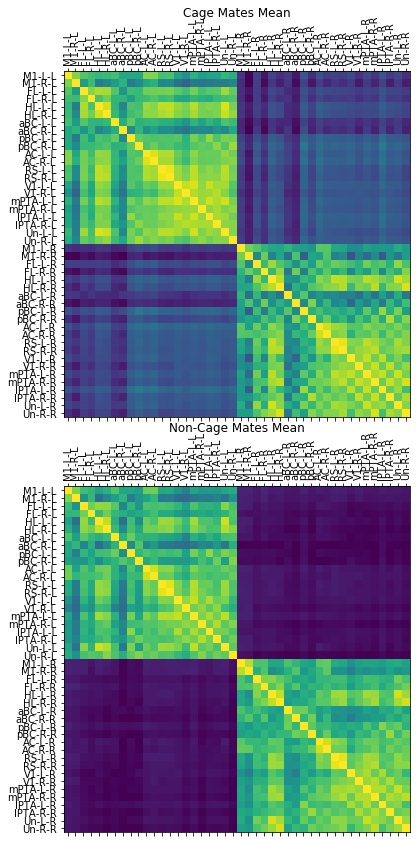

In [18]:
fig, (ax, ax1) = plt.subplots(2,1, figsize=(7,14))
ax.matshow(together_mean, vmin=0, vmax=1, cmap='viridis')
ax.set_title("Cage Mates Mean", y=1.14)
ax.set_yticks([i for i in range(len(the_labels))])
ax.set_xticks([i for i in range(len(the_labels))])
ax.set_xticklabels(the_labels, rotation='vertical')
ax.set_yticklabels(the_labels)

ax1.matshow(separate_mean, vmin=0, vmax=1, cmap='viridis')
ax1.set_title("Non-Cage Mates Mean", y=1.14)
ax1.set_yticks([i for i in range(len(the_labels))])
ax1.set_xticks([i for i in range(len(the_labels))])
ax1.set_xticklabels(the_labels, rotation='vertical')
ax1.set_yticklabels(the_labels)

[Text(0,0,'M1-L-L'),
 Text(0,0,'M1-R-L'),
 Text(0,0,'FL-L-L'),
 Text(0,0,'FL-R-L'),
 Text(0,0,'HL-L-L'),
 Text(0,0,'HL-R-L'),
 Text(0,0,'aBC-L-L'),
 Text(0,0,'aBC-R-L'),
 Text(0,0,'pBC-L-L'),
 Text(0,0,'pBC-R-L'),
 Text(0,0,'AC-L-L'),
 Text(0,0,'AC-R-L'),
 Text(0,0,'RS-L-L'),
 Text(0,0,'RS-R-L'),
 Text(0,0,'V1-L-L'),
 Text(0,0,'V1-R-L'),
 Text(0,0,'mPTA-L-L'),
 Text(0,0,'mPTA-R-L'),
 Text(0,0,'lPTA-L-L'),
 Text(0,0,'lPTA-R-L'),
 Text(0,0,'Un-L-L'),
 Text(0,0,'Un-R-L'),
 Text(0,0,'M1-L-R'),
 Text(0,0,'M1-R-R'),
 Text(0,0,'FL-L-R'),
 Text(0,0,'FL-R-R'),
 Text(0,0,'HL-L-R'),
 Text(0,0,'HL-R-R'),
 Text(0,0,'aBC-L-R'),
 Text(0,0,'aBC-R-R'),
 Text(0,0,'pBC-L-R'),
 Text(0,0,'pBC-R-R'),
 Text(0,0,'AC-L-R'),
 Text(0,0,'AC-R-R'),
 Text(0,0,'RS-L-R'),
 Text(0,0,'RS-R-R'),
 Text(0,0,'V1-L-R'),
 Text(0,0,'V1-R-R'),
 Text(0,0,'mPTA-L-R'),
 Text(0,0,'mPTA-R-R'),
 Text(0,0,'lPTA-L-R'),
 Text(0,0,'lPTA-R-R'),
 Text(0,0,'Un-L-R'),
 Text(0,0,'Un-R-R')]

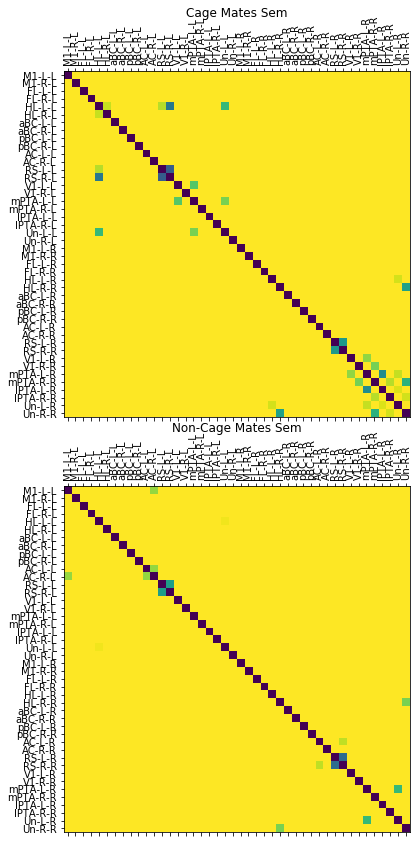

In [19]:
fig, (ax, ax1) = plt.subplots(2,1, figsize=(7,14))
ax.matshow(together_std, vmin=0, vmax=0.035, cmap='viridis')
ax.set_title("Cage Mates Sem", y=1.14)
ax.set_yticks([i for i in range(len(the_labels))])
ax.set_xticks([i for i in range(len(the_labels))])
ax.set_xticklabels(the_labels, rotation='vertical')
ax.set_yticklabels(the_labels)

ax1.matshow(separate_std,  vmin=0, vmax=0.035, cmap='viridis')
ax1.set_title("Non-Cage Mates Sem", y=1.14)
ax1.set_yticks([i for i in range(len(the_labels))])
ax1.set_xticks([i for i in range(len(the_labels))])
ax1.set_xticklabels(the_labels, rotation='vertical')
ax1.set_yticklabels(the_labels)

### 3D Surface plot of means

#### !!!! Original code makes no sense

In [ ]:
import cv2
cm_mean_color = cv2.cvtColor(cm_mean.astype(np.float32),cv2.COLOR_GRAY2RGB)
ncm_mean_color = cv2.cvtColor(ncm_mean.astype(np.float32), cv2.COLOR_GRAY2RGB)

In [ ]:
fig = plt.figure()
ax0 = fig.add_subplot(2, 1, 1, projection='3d')
x0, y0 = numpy.mgrid[0:cm_mean.shape[0], 0:cm_mean.shape[1]]
ax0.plot_surface(x0, y0, cm_sem, rstride=1, cstride=1, cmap='viridis')

x1, y1 = numpy.mgrid[0:ncm_mean.shape[0], 0:ncm_mean.shape[1]]
ax1 = fig.add_subplot(2, 1, 2, projection='3d')
ax1.plot_surface(x1, y1, ncm_sem, rstride=1, cstride=1, cmap='viridis')
ax1.set_zlim()